In [50]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
path = "/Users/shivranjan/Downloads/Wadhwani Workspace/Ministry of Education/visitor_count.csv"

In [3]:
vdc = pd.read_csv(path)

# Read CSV file without header
vdc = pd.read_csv(path, header=None, names=['Timestamp', 'Visitor Count'])

In [4]:
vdc.head(5)

,Timestamp,Visitor Count
0,2023-08-29 15:24:47,1959056
1,2023-08-29 15:39:47,1959069
2,2023-08-29 15:54:47,1959080
3,2023-08-29 16:09:47,1959087
4,2023-08-29 16:24:48,1959101


In [5]:
# vdc.sample()

In [6]:
vdc.shape

(560, 2)

In [7]:
timestamp_format = "%Y-%m-%d %H:%M:%S"  # New timestamp format

In [8]:
# Add new columns for date and time
vdc['Date'] = ''
vdc['Time'] = ''
vdc['Time_of_Day'] = ''
vdc['New Visitors Count'] = 0  # Initialize the new column with zeros

In [9]:
for index, row in vdc.iterrows():
    timestamp_str = row['Timestamp']
    
    # Parse the timestamp string
    timestamp = datetime.strptime(timestamp_str, timestamp_format)
    
    # Extract date and time components
    vdc.at[index, 'Date'] = timestamp.date()
    vdc.at[index, 'Time'] = timestamp.time()
    
    # Determine AM or PM based on current time
    if timestamp.time().hour < 12:
        vdc.at[index, 'Time_of_Day'] = 'AM'
    else:
        vdc.at[index, 'Time_of_Day'] = 'PM'
        
    
    # Find the indices for the visitor count rows
    visitor_indices = vdc[vdc['Timestamp'] == timestamp_str].index
    
    if len(visitor_indices) == 1 and visitor_indices[0] >= 1:
        # Calculate the difference in visitor count
        diff_visitor_count = vdc.loc[visitor_indices[0], 'Visitor Count'] - vdc.loc[visitor_indices[0] - 1, 'Visitor Count']
        vdc.at[index, 'New Visitors Count'] = diff_visitor_count

In [10]:
visitor_indices

Int64Index([559], dtype='int64')

In [63]:
vdc.head(5)

,Timestamp,Visitor Count,Date,Time,Time_of_Day,New Visitors Count,NewTime,time_period,Time of Day,Time Interval,Time Interval Code
0,2023-08-29 15:24:47,1959056,2023-08-29,15:24:47,PM,0,1900-01-01 15:24:47,Afternoon,PM,15:00 to 18:00,0
1,2023-08-29 15:39:47,1959069,2023-08-29,15:39:47,PM,13,1900-01-01 15:39:47,Afternoon,PM,15:00 to 18:00,0
2,2023-08-29 15:54:47,1959080,2023-08-29,15:54:47,PM,11,1900-01-01 15:54:47,Afternoon,PM,15:00 to 18:00,0
3,2023-08-29 16:09:47,1959087,2023-08-29,16:09:47,PM,7,1900-01-01 16:09:47,Evening,PM,15:00 to 18:00,0
4,2023-08-29 16:24:48,1959101,2023-08-29,16:24:48,PM,14,1900-01-01 16:24:48,Evening,PM,15:00 to 18:00,0


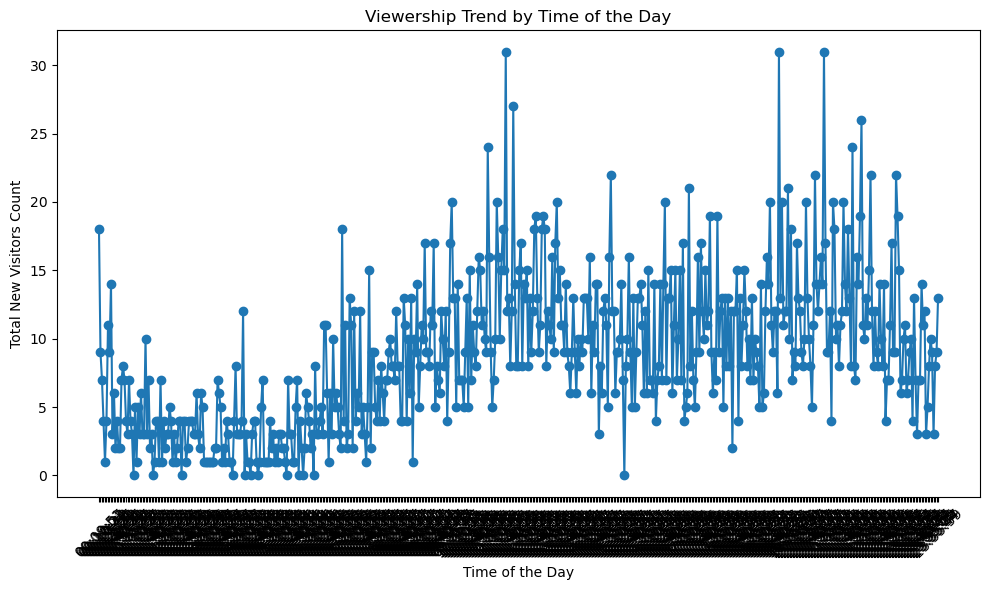

In [68]:
# Group by time of the day and sum the new visitor counts
grouped_df = vdc.groupby('Time')['New Visitors Count'].sum().reset_index()

# Convert time objects to strings
grouped_df['Time'] = grouped_df['Time'].apply(lambda x: x.strftime('%H:%M:%S'))

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Time'], grouped_df['New Visitors Count'], marker='o')
plt.xlabel('Time of the Day')
plt.ylabel('Total New Visitors Count')
plt.title('Viewership Trend by Time of the Day')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

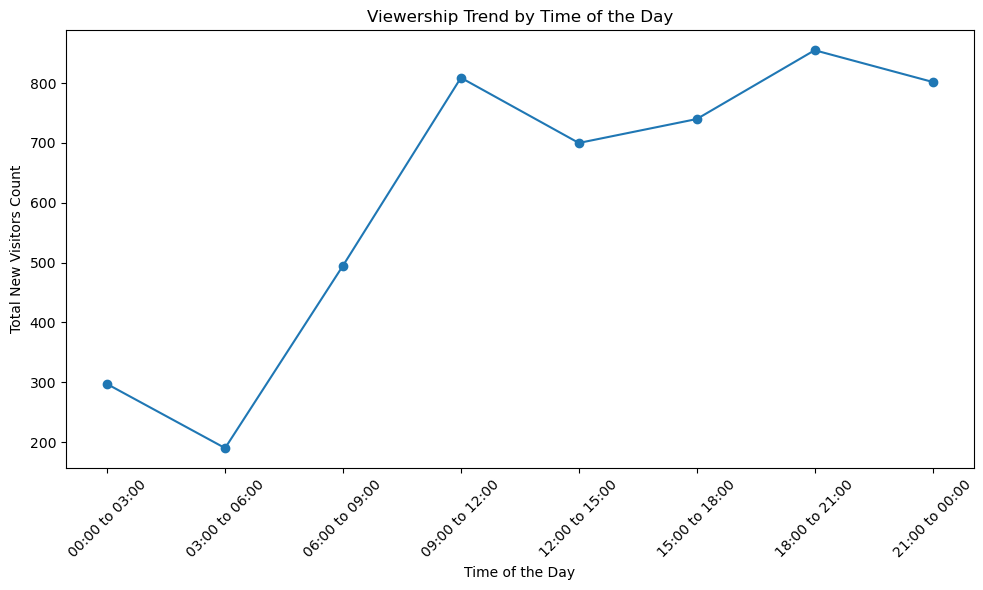

In [67]:
# Group by time of the day and sum the new visitor counts
grouped_df = vdc.groupby('Time Interval')['New Visitors Count'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Time Interval'], grouped_df['New Visitors Count'], marker='o')
plt.xlabel('Time of the Day')
plt.ylabel('Total New Visitors Count')
plt.title('Viewership Trend by Time of the Day')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()



In [13]:
vdc['NewTime'] = pd.to_datetime(vdc['Time'], format='%H:%M:%S')

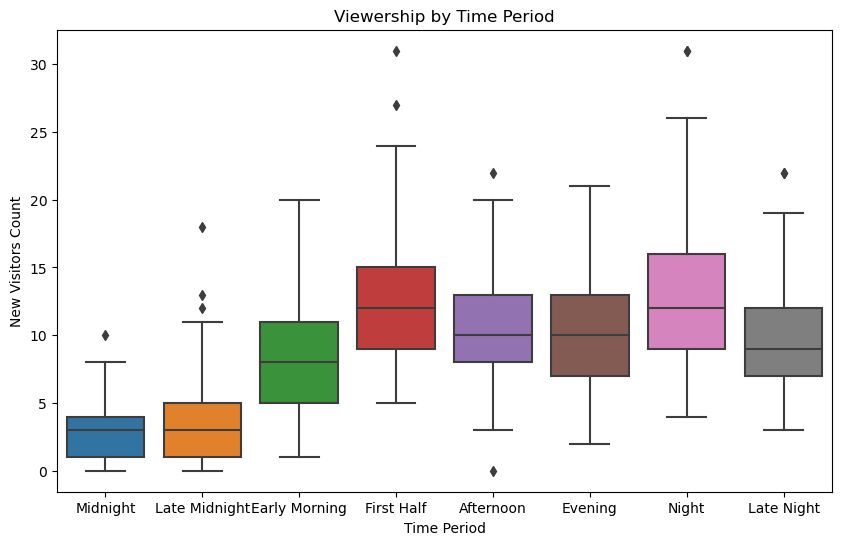

In [40]:
# Create a new column for time periods (morning, afternoon, evening)
vdc['time_period'] = pd.cut(vdc['NewTime'].dt.hour, 
                            bins = [0, 3, 6, 9, 12, 15, 18, 21, 24], 
                            labels = ['Midnight', 'Late Midnight', 'Early Morning', 'First Half', 'Afternoon', 'Evening', 'Night', 'Late Night']
                           )

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=vdc, x='time_period', y='New Visitors Count')
plt.xlabel('Time Period')
plt.ylabel('New Visitors Count')
plt.title('Viewership by Time Period')
plt.show()

In [18]:
vdc.head(5)

,Timestamp,Visitor Count,Date,Time,Time_of_Day,New Visitors Count,NewTime,time_period
0,2023-08-29 15:24:47,1959056,2023-08-29,15:24:47,PM,0,1900-01-01 15:24:47,Evening
1,2023-08-29 15:39:47,1959069,2023-08-29,15:39:47,PM,13,1900-01-01 15:39:47,Evening
2,2023-08-29 15:54:47,1959080,2023-08-29,15:54:47,PM,11,1900-01-01 15:54:47,Evening
3,2023-08-29 16:09:47,1959087,2023-08-29,16:09:47,PM,7,1900-01-01 16:09:47,Night
4,2023-08-29 16:24:48,1959101,2023-08-29,16:24:48,PM,14,1900-01-01 16:24:48,Night


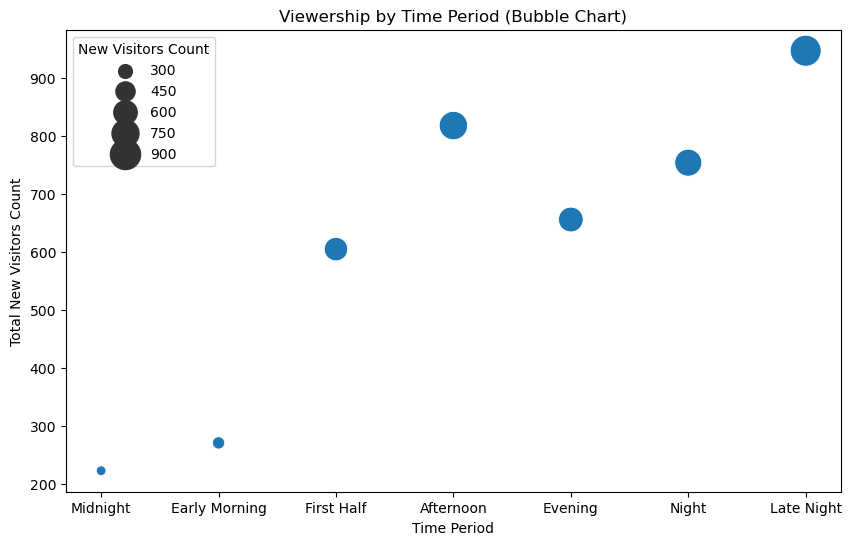

In [19]:
# Group by time period and calculate total viewership count
grouped_df = vdc.groupby('time_period')['New Visitors Count'].sum().reset_index()

# Create a bubble chart
plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_df, x='time_period', y='New Visitors Count', size='New Visitors Count', sizes=(50, 500))
plt.xlabel('Time Period')
plt.ylabel('Total New Visitors Count')
plt.title('Viewership by Time Period (Bubble Chart)')
plt.show()

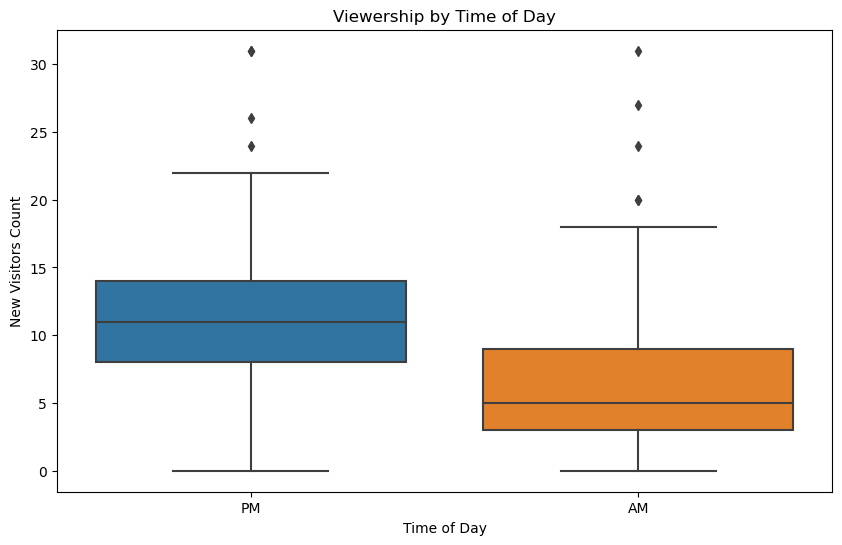

In [21]:
# Create a box plot based on 'Time_of_Day'
plt.figure(figsize = (10, 6))
sns.boxplot(data = vdc, x='Time_of_Day', y='New Visitors Count')
plt.xlabel('Time of Day')
plt.ylabel('New Visitors Count')
plt.title('Viewership by Time of Day')
plt.show()

In [23]:
# Convert 'Timestamp' column to datetime
vdc['Timestamp'] = pd.to_datetime(vdc['Timestamp'])

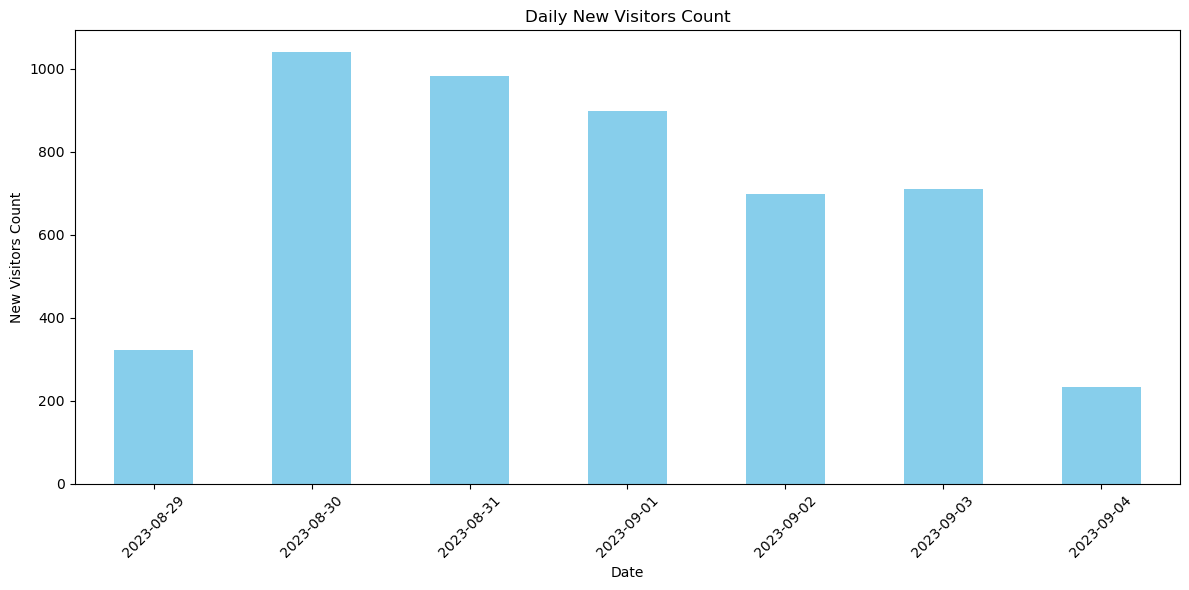

In [24]:
# Group the data by date and sum the 'New Visitors Count'
daily_new_visitors = vdc.groupby(vdc['Timestamp'].dt.date)['New Visitors Count'].sum()

# Create a bar chart to visualize daily new visitors
plt.figure(figsize=(12, 6))
daily_new_visitors.plot(kind='bar', color='skyblue')
plt.xlabel('Date')
plt.ylabel('New Visitors Count')
plt.title('Daily New Visitors Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Create a function to categorize time periods (AM vs. PM)
def categorize_time_period(time_of_day):
    if time_of_day == 'AM':
        return 'AM'
    else:
        return 'PM'

In [26]:
# Create a list of time intervals
time_intervals = [
    '00:00 to 03:00', '03:00 to 06:00', '06:00 to 09:00', '09:00 to 12:00',
    '12:00 to 15:00', '15:00 to 18:00', '18:00 to 21:00', '21:00 to 00:00'
]

In [27]:
# Create a function to categorize time intervals
def categorize_time_interval(timestamp):
    hour = timestamp.hour
    for i, interval in enumerate(range(0, 24, 3)):
        if hour < interval + 3:
            return time_intervals[i]

In [33]:
# Create a new column for time period (AM vs. PM)
vdc['Time of Day'] = vdc['Time_of_Day'].apply(categorize_time_period)

In [34]:
# Group the data by 'Time Period' and sum the 'New Visitors Count'
time_period_visitors = vdc.groupby('Time of Day')['New Visitors Count'].sum()

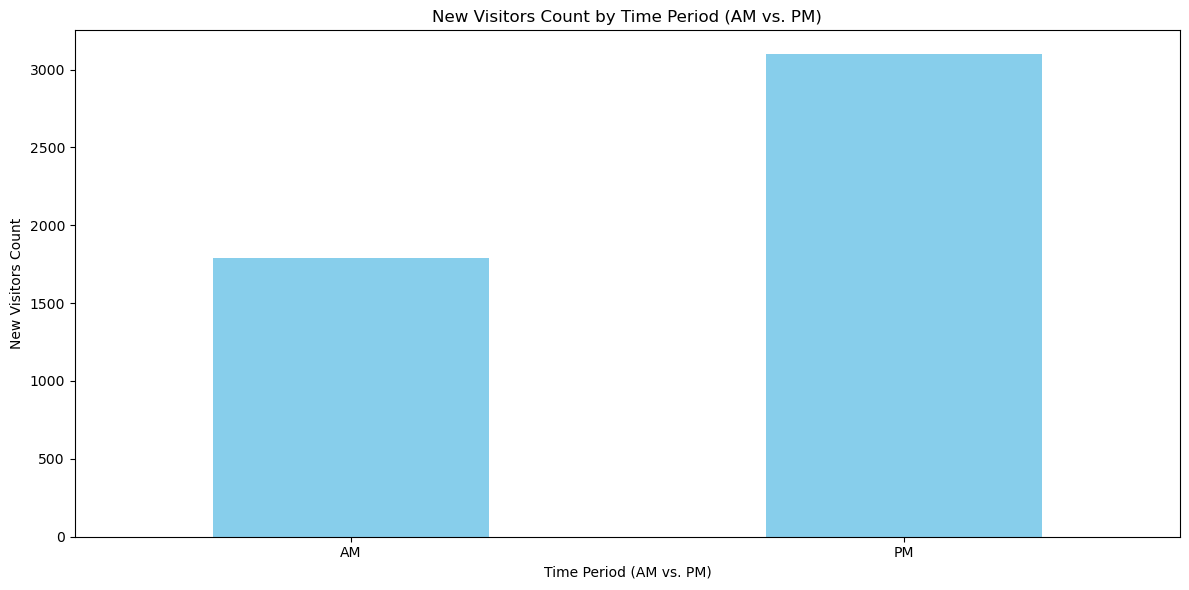

In [35]:
# Create a bar chart to visualize AM vs. PM
plt.figure(figsize=(12, 6))
time_period_visitors.plot(kind='bar', color='skyblue')
plt.xlabel('Time Period (AM vs. PM)')
plt.ylabel('New Visitors Count')
plt.title('New Visitors Count by Time Period (AM vs. PM)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [37]:
# Drop the original timestamp column
vdc.drop('Time Period', axis=1, inplace=True)
vdc.head(5)

,Timestamp,Visitor Count,Date,Time,Time_of_Day,New Visitors Count,NewTime,time_period,Time of Day
0,2023-08-29 15:24:47,1959056,2023-08-29,15:24:47,PM,0,1900-01-01 15:24:47,Evening,PM
1,2023-08-29 15:39:47,1959069,2023-08-29,15:39:47,PM,13,1900-01-01 15:39:47,Evening,PM
2,2023-08-29 15:54:47,1959080,2023-08-29,15:54:47,PM,11,1900-01-01 15:54:47,Evening,PM
3,2023-08-29 16:09:47,1959087,2023-08-29,16:09:47,PM,7,1900-01-01 16:09:47,Night,PM
4,2023-08-29 16:24:48,1959101,2023-08-29,16:24:48,PM,14,1900-01-01 16:24:48,Night,PM


In [31]:
# Create a list of time intervals
time_intervals = [
    '00:00 to 03:00', '03:00 to 06:00', '06:00 to 09:00', '09:00 to 12:00',
    '12:00 to 15:00', '15:00 to 18:00', '18:00 to 21:00', '21:00 to 00:00'
]

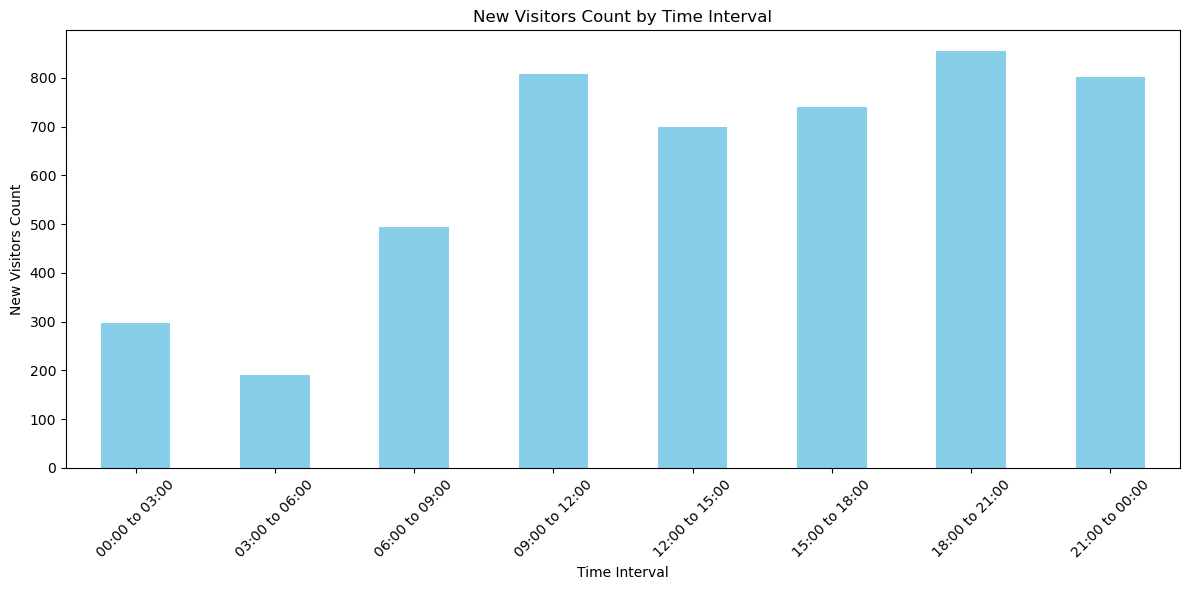

In [38]:
# Create a new column for time interval
vdc['Time Interval'] = vdc['Timestamp'].apply(categorize_time_interval)

# Group the data by 'Time Interval' and sum the 'New Visitors Count'
interval_visitors = vdc.groupby('Time Interval')['New Visitors Count'].sum()

# Create a bar chart to visualize time intervals
plt.figure(figsize=(12, 6))
interval_visitors.plot(kind='bar', color='skyblue')
plt.xlabel('Time Interval')
plt.ylabel('New Visitors Count')
plt.title('New Visitors Count by Time Interval')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

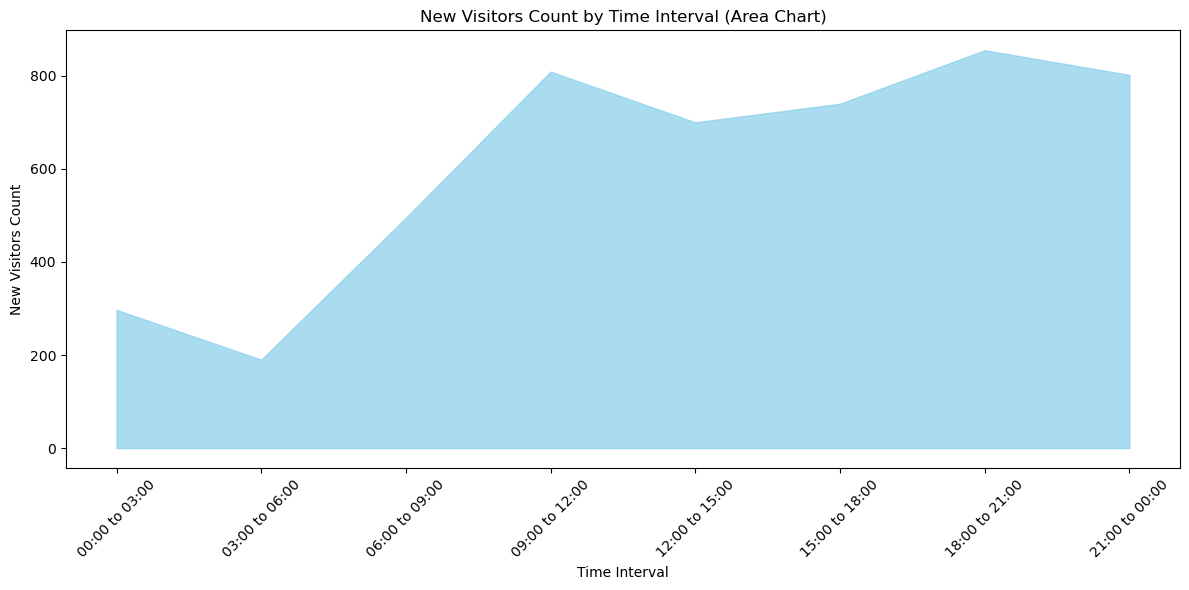

In [39]:
# Group the data by 'Time Interval' and sum the 'New Visitors Count'
interval_visitors = vdc.groupby('Time Interval')['New Visitors Count'].sum()

# Create an area chart to visualize time intervals
plt.figure(figsize=(12, 6))
plt.fill_between(interval_visitors.index, 0, interval_visitors.values, color='skyblue', alpha=0.7)
plt.xlabel('Time Interval')
plt.ylabel('New Visitors Count')
plt.title('New Visitors Count by Time Interval (Area Chart)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

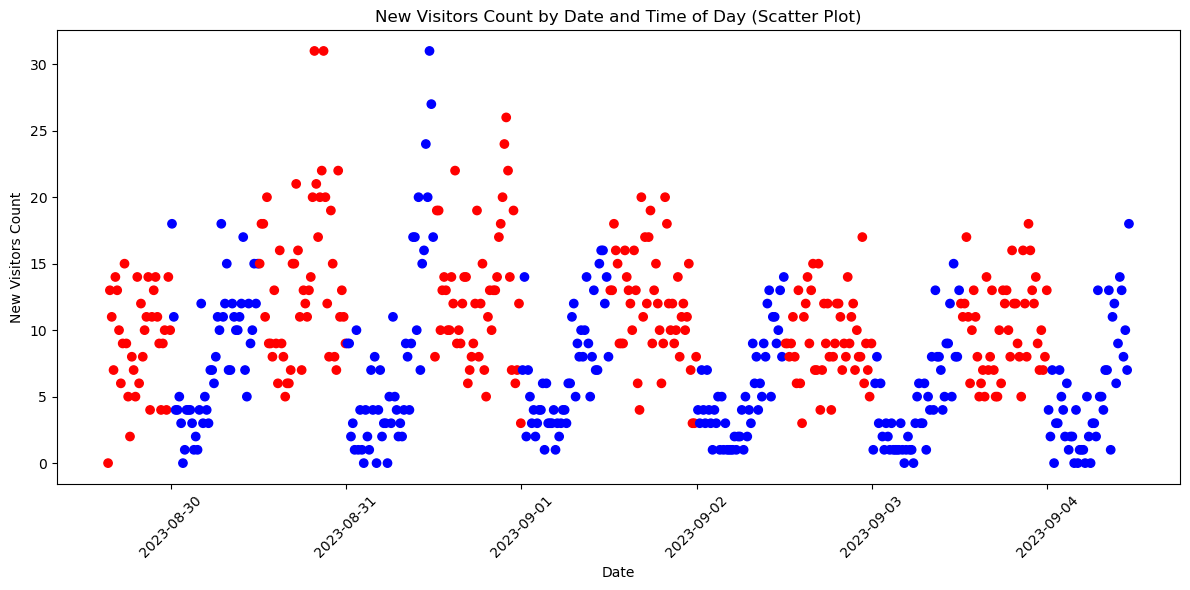

In [42]:
# Create a scatter plot to visualize 'Date,' 'New Visitors Count,' and 'Time of Day'
plt.figure(figsize=(12, 6))
plt.scatter(vdc['Timestamp'], vdc['New Visitors Count'], c=vdc['Time of Day'].map({'AM': 'blue', 'PM': 'red'}), label=vdc['Time_of_Day'])
plt.xlabel('Date')
plt.ylabel('New Visitors Count')
plt.title('New Visitors Count by Date and Time of Day (Scatter Plot)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Create a scatter plot to visualize 'Date,' 'New Visitors Count,' and 'Time of Day'
plt.figure(figsize=(12, 6))
sc = plt.scatter(vdc['Timestamp'], vdc['New Visitors Count'], c=vdc['Time_of_Day'].map({'AM': 0, 'PM': 1}), cmap=cm.get_cmap('coolwarm'))
plt.xlabel('Date')
plt.ylabel('New Visitors Count')
plt.title('New Visitors Count by Date and Time of Day (Scatter Plot)')

# Add a colorbar to display the color code
cbar = plt.colorbar(sc, ticks=[0, 1], orientation='vertical')
cbar.set_label('Time of Day', rotation=90)
cbar.set_ticklabels(['AM', 'PM'])

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


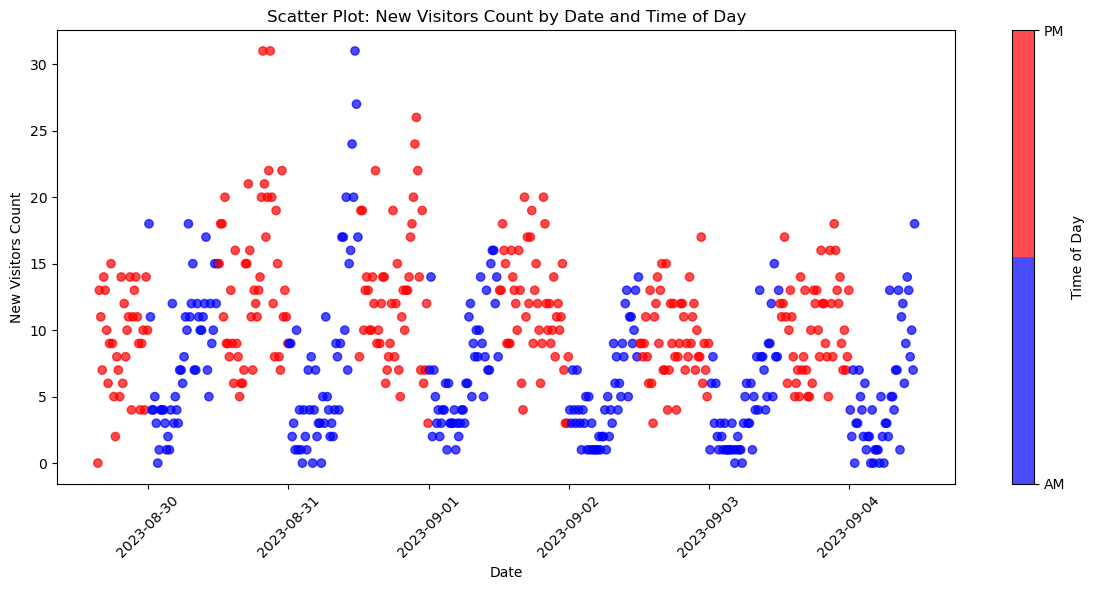

In [61]:
# Create a scatter plot to visualize 'Date,' 'Time of Day,' and 'New Visitors Count'
plt.figure(figsize=(12, 6))

# Define colors for 'AM' and 'PM'
colors = ListedColormap(['blue', 'red'])

# Plot the scatter points with 'Time of Day' as colors
sc = plt.scatter(vdc['Timestamp'], vdc['New Visitors Count'], c=vdc['Time_of_Day'].map({'AM': 0, 'PM': 1}), cmap=colors, label=vdc['Time_of_Day'], alpha=0.7)

# Add a colorbar to display the color code
cbar = plt.colorbar(sc, ticks=[0, 1])
cbar.set_label('Time of Day')
cbar.set_ticklabels(['AM', 'PM'])

plt.xlabel('Date')
plt.ylabel('New Visitors Count')
plt.title('Scatter Plot: New Visitors Count by Date and Time of Day')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Create a scatter plot to visualize 'Date,' 'Time Interval,' and 'New Visitors Count'
plt.figure(figsize=(12, 6))

# Define colors for 'Time Interval'
unique_intervals = vdc['Time Interval'].unique()
colors = ListedColormap([plt.get_cmap('tab10')(i) for i in range(len(unique_intervals))])

# Map 'Time Interval' to a unique integer for coloring
time_interval_mapping = {interval: i for i, interval in enumerate(unique_intervals)}
vdc['Time Interval Code'] = vdc['Time Interval'].map(time_interval_mapping)

sc = plt.scatter(vdc['Timestamp'], vdc['Time Interval'], c=vdc['Time Interval Code'], cmap=colors, label=vdc['Time Interval'], alpha=0.7)

# Add a colorbar to display the color code
cbar = plt.colorbar(sc, ticks=range(len(unique_intervals)))
cbar.set_label('Time Interval')
cbar.set_ticklabels(unique_intervals)

plt.xlabel('Date')
plt.ylabel('Time Interval')  # Modify the y-axis label
plt.title('Scatter Plot: Time Interval by Date')
plt.legend(title='Time Interval', loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Create a scatter plot to visualize 'Date,' 'Time Interval,' and 'New Visitors Count'
plt.figure(figsize=(12, 6))

# Define colors for 'Time Interval'
unique_intervals = vdc['Time Interval'].unique()
colors = ListedColormap([plt.get_cmap('tab10')(i) for i in range(len(unique_intervals))])

# Map 'Time Interval' to a unique integer for coloring
time_interval_mapping = {interval: i for i, interval in enumerate(unique_intervals)}
vdc['Time Interval Code'] = vdc['Time Interval'].map(time_interval_mapping)

sc = plt.scatter(vdc['Timestamp'], vdc['Time Interval'], c=vdc['New Visitors Count'], cmap='coolwarm', label=vdc['Time Interval'], alpha=0.7)

# Add a colorbar to display the color code
cbar = plt.colorbar(sc, label='New Visitors Count')
cbar.set_label('New Visitors Count')

plt.xlabel('Date')
plt.ylabel('Time Interval')  # Modify the y-axis label
plt.title('Scatter Plot: Time Interval by Date')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

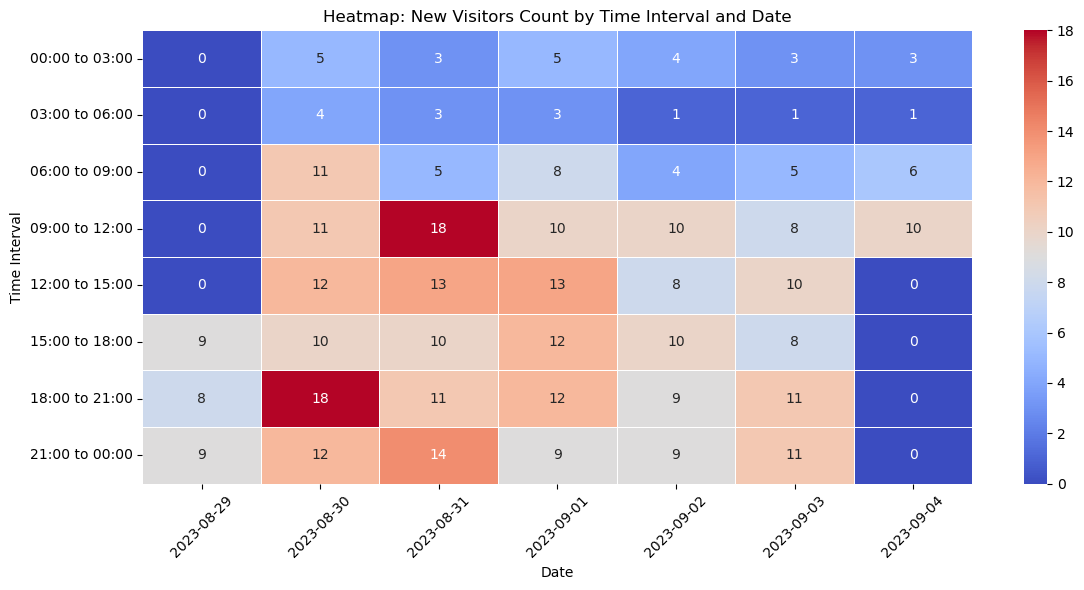

In [60]:
# Pivot the DataFrame to create a heatmap-like plot
heatmap_data = vdc.pivot_table(index='Time Interval', columns='Date', values='New Visitors Count', fill_value=0)

# Convert 'New Visitors Count' values to integers
heatmap_data = heatmap_data.astype(int)

# Create a heatmap plot
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.xlabel('Date')
plt.ylabel('Time Interval')
plt.title('Heatmap: New Visitors Count by Time Interval and Date')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()